### Data science works (Project RNA editing)

### Differential editing analysis

In [1]:
import pandas as pd
import json
import os

# vars
WORKDIR = "/home/b05b01002/HDD3/project_RE/"
PARAMS = "configs/differential_editing/Egr.json"

# change work direction
os.chdir(WORKDIR)
params = json.load(open(PARAMS))

import pvalue.csv

In [4]:
pvalues = pd.read_csv(
    params["outdir"],
    names = [
        "Region",
        "Position",
        "Subtype"
    ] + params["pairing"]
)
pvalues

,Region,Position,Subtype,xylem:phloem,xylem:leaf,xylem:shoot
0,Chr01,100092,TG,NaN,NaN,NaN
1,Chr01,100093,TG,NaN,NaN,NaN
2,Chr01,10412169,TC,NaN,NaN,NaN
3,Chr01,10413299,TC,NaN,NaN,NaN
4,Chr01,10414032,AG,NaN,NaN,NaN
...,...,...,...,...,...,...
190215,scaffold_987,8590,AG,0.830,NaN,NaN
190216,scaffold_991,2775,GA,NaN,NaN,NaN
190217,scaffold_991,1722,AG,0.460,0.576,0.901
190218,scaffold_991,1376,CA,0.100,0.990,1.000


exclude rows with 3 NaN

In [5]:
na_3dropped = pvalues.dropna(axis=0, thresh=1, subset=params["pairing"])
na_3dropped

,Region,Position,Subtype,xylem:phloem,xylem:leaf,xylem:shoot
7,Chr01,10413507,AG,1.000,0.000,0.126
8,Chr01,10482731,AC,NaN,0.070,0.112
9,Chr01,10482834,CA,NaN,0.095,0.121
10,Chr01,10482931,TC,NaN,1.000,0.183
11,Chr01,10483476,GT,NaN,0.429,1.000
...,...,...,...,...,...,...
190214,scaffold_991,13333,AG,NaN,0.606,0.176
190215,scaffold_987,8590,AG,0.830,NaN,NaN
190217,scaffold_991,1722,AG,0.460,0.576,0.901
190218,scaffold_991,1376,CA,0.100,0.990,1.000


exclude rows with NaN

In [7]:
na_dropped = pvalues.dropna(axis=0)
na_dropped

,Region,Position,Subtype,xylem:phloem,xylem:leaf,xylem:shoot
7,Chr01,10413507,AG,1.000,0.000,0.126
13,Chr01,10490455,TC,0.149,1.000,1.000
14,Chr01,10413587,TC,0.662,0.000,0.237
15,Chr01,10491752,TC,1.000,0.101,1.000
16,Chr01,10473468,GA,1.000,1.000,0.171
...,...,...,...,...,...,...
190212,scaffold_987,7682,TC,1.000,0.998,0.121
190213,scaffold_991,1245,CG,0.896,0.475,0.592
190217,scaffold_991,1722,AG,0.460,0.576,0.901
190218,scaffold_991,1376,CA,0.100,0.990,1.000


find positions where all p-value < 0.05

In [17]:
xylem_spec = na_dropped[
    (na_dropped["xylem:phloem"] < 0.05) &
    (na_dropped["xylem:leaf"] < 0.05) &
    (na_dropped["xylem:shoot"] < 0.05)
]
xylem_spec.sort_values(by=["Region", "Position"])
xylem_spec

,Region,Position,Subtype,xylem:phloem,xylem:leaf,xylem:shoot
87,Chr01,11116387,CT,0.005,0.001,0.003
95,Chr01,11117874,AG,0.040,0.005,0.030
463,Chr01,12173000,CT,0.011,0.015,0.016
495,Chr01,12208318,AC,0.010,0.031,0.015
512,Chr01,12208319,TC,0.014,0.039,0.020
...,...,...,...,...,...,...
189536,scaffold_587,1169,TC,0.025,0.003,0.004
189558,scaffold_587,38562,CA,0.004,0.024,0.019
189613,scaffold_621,12154,TC,0.011,0.015,0.004
189803,scaffold_70,70953,GA,0.013,0.041,0.002


In [18]:
xylem_spec.to_csv("temp/egr_xylem_specific.csv")

### Annotated xylem-specific editing sites

In [16]:
annotated = pd.read_csv(
    "/home/b05b01002/HDD3/project_RE/test/ANNOVAR-test/final.Egr_multianno.txt", 
    sep = "\t"
)
annotated.set_index(["Chr", "Start"])

End Ref Alt Func.refGene            Gene.refGene  \
Chr          Start                                                             
Chr01        100092      100092   T   G     intronic       Eucgr.A00216.v2.0   
             100093      100093   T   G     intronic       Eucgr.A00216.v2.0   
             10412169  10412169   T   C       exonic       Eucgr.A00959.v2.0   
             10413299  10413299   T   C       exonic       Eucgr.A00959.v2.0   
             10414032  10414032   A   G       exonic       Eucgr.A00959.v2.0   
...                         ...  ..  ..          ...                     ...   
scaffold_987 8590          8590   A   G   intergenic               NONE;NONE   
scaffold_991 2775          2775   G   A   intergenic  Eucgr.L02525.v2.0;NONE   
             1722          1722   A   G     upstream       Eucgr.L02525.v2.0   
             1376          1376   C   A     upstream       Eucgr.L02525.v2.0   
             1693          1693   A   C     upstream       Eucgr.L02525.v2.0   

                        GeneDetail.refGene ExonicFunc.refGene  \
Chr          Start                                              
Chr01        100092                    NaN                NaN   
             100093                    NaN                NaN   
             10412169                  NaN  nonsynonymous SNV   
             10413299                  NaN     synonymous SNV   
             10414032                  NaN     synonymous SNV   
...                                    ...                ...   
scaffold_987 8590      dist=NONE;dist=NONE                NaN   
scaffold_991 2775      dist=1411;dist=NONE                NaN   
             1722                 dist=358                NaN   
             1376                  dist=12                NaN   
             1693                 dist=329                NaN   

                                                        AAChange.refGene  
Chr          Start                                                        
Chr01        100092                                                  NaN  
             100093                                                  NaN  
             10412169  Eucgr.A00959.v2.0:Eucgr.A00959.1.v2.0:exon6:c....  
             10413299  Eucgr.A00959.v2.0:Eucgr.A00959.1.v2.0:exon9:c....  
             10414032  Eucgr.A00959.v2.0:Eucgr.A00959.1.v2.0:exon11:c...  
...                                                                  ...  
scaffold_987 8590                                                    NaN  
scaffold_991 2775                                                    NaN  
             1722                                                    NaN  
             1376                                                    NaN  
             1693                                                    NaN  

[190220 rows x 8 columns]

In [19]:
xylem_spec.set_index(["Region", "Position"])

Subtype  xylem:phloem  xylem:leaf  xylem:shoot
Region       Position                                               
Chr01        11116387      CT         0.005       0.001        0.003
             11117874      AG         0.040       0.005        0.030
             12173000      CT         0.011       0.015        0.016
             12208318      AC         0.010       0.031        0.015
             12208319      TC         0.014       0.039        0.020
...                       ...           ...         ...          ...
scaffold_587 1169          TC         0.025       0.003        0.004
             38562         CA         0.004       0.024        0.019
scaffold_621 12154         TC         0.011       0.015        0.004
scaffold_70  70953         GA         0.013       0.041        0.002
scaffold_942 7540          CT         0.038       0.000        0.001

[2420 rows x 4 columns]

In [22]:
annotated_xylem_spec = annotated.iloc[xylem_spec.index]
annotated_xylem_spec

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene
87,Chr01,11116387,11116387,C,T,UTR5,Eucgr.A00907.v2.0,Eucgr.A00907.1.v2.0:c.-17C>T,NaN,NaN
95,Chr01,11117874,11117874,A,G,UTR3,Eucgr.A00907.v2.0,Eucgr.A00907.1.v2.0:c.*19A>G,NaN,NaN
463,Chr01,12173000,12173000,C,T,exonic,Eucgr.A00810.v2.0,NaN,nonsynonymous SNV,Eucgr.A00810.v2.0:Eucgr.A00810.1.v2.0:exon1:c....
495,Chr01,12208318,12208318,A,C,exonic,Eucgr.A00807.v2.0,NaN,nonsynonymous SNV,Eucgr.A00807.v2.0:Eucgr.A00807.1.v2.0:exon1:c....
512,Chr01,12208319,12208319,T,C,exonic,Eucgr.A00807.v2.0,NaN,nonsynonymous SNV,Eucgr.A00807.v2.0:Eucgr.A00807.1.v2.0:exon1:c....
...,...,...,...,...,...,...,...,...,...,...
189536,scaffold_587,1169,1169,T,C,intergenic,NONE;Eucgr.L02107.v2.0,dist=NONE;dist=34988,NaN,NaN
189558,scaffold_587,38562,38562,C,A,exonic,Eucgr.L02107.v2.0,NaN,synonymous SNV,Eucgr.L02107.v2.0:Eucgr.L02107.1.v2.0:exon1:c....
189613,scaffold_621,12154,12154,T,C,exonic,Eucgr.L02145.v2.0,NaN,synonymous SNV,Eucgr.L02145.v2.0:Eucgr.L02145.1.v2.0:exon2:c....
189803,scaffold_70,70953,70953,G,A,intergenic,Eucgr.L00910.v2.0;Eucgr.L00913.v2.0,dist=38297;dist=23593,NaN,NaN


In [28]:
annotated_xylem_spec["Func.refGene"]

87              UTR5
95              UTR3
463           exonic
495           exonic
512           exonic
             ...    
189536    intergenic
189558        exonic
189613        exonic
189803    intergenic
190139        exonic
Name: Func.refGene, Length: 2420, dtype: object

Count outcome of Eucalyptus xylem-specific editing sites

In [56]:
from collections import defaultdict
func = defaultdict(int)
exonic = defaultdict(int)
for idx, row in annotated_xylem_spec.iterrows():
    func[row["Func.refGene"]] += 1
    if row["Func.refGene"] == "exonic":
        exonic[row["ExonicFunc.refGene"]] += 1

In [63]:
print(json.dumps(func, indent=4))

{
    "UTR5": 194,
    "UTR3": 242,
    "exonic": 1401,
    "intergenic": 353,
    "upstream": 44,
    "intronic": 105,
    "downstream": 44,
    "UTR5;UTR3": 2,
    "splicing": 30,
    "upstream;downstream": 3,
    "exonic;splicing": 2
}


In [64]:
print(json.dumps(exonic, indent=4))

{
    "nonsynonymous SNV": 854,
    "synonymous SNV": 494,
    "stopgain": 50,
    "stoploss": 3
}


## OLD

Configs

In [1]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import seaborn as sns
import pandas as pd
import glob
import os


WORKDIR = Path("/home/b05b01002/HDD3/project_RE")
MYDB_PATH = Path("mydb")
FAI = {
    "Ptr": Path("genomic_data/Ptr/Ptr.fa.fai"),
    "Egr": Path("genomic_data/Egr/Egr.fa.fai")
}
ARCHIVE_PATH = Path("pyout/archive-20221207")
FILTERED_PATH = {
    "Ptr": Path("shout/filtered/Ptr"),
    "Egr": Path("shout/filtered/Egr")
}
SAMPLES = {
    "Ptr": [
        "ptr-SAMN04535869-xr.txt", "ptr-SAMN04535870-xr.txt", "ptr-SAMN04535936-xr.txt", "ptr-SAMN04535937-xr.txt", "ptr-SAMN04535946-xr.txt", "ptr-SAMN04535958-xr.txt", "ptr-SAMN04535959-xr.txt", "ptr-SAMN04535960-xr.txt", "ptr-SAMN04536034-xr.txt", "ptr-SAMN04536035-xr.txt", "ptr-SAMN04536036-xr.txt", "ptr-SAMN04536096-xr.txt", "ptr-SAMN04536100-xr.txt", "ptr-SAMN04536101-xr.txt", "ptr-SAMN04536102-xr.txt", "ptr-SAMN04536244-xr.txt", "ptr-SAMN04536245-xr.txt", "ptr-SAMN04536246-xr.txt", "ptr-SAMN04569083-xr.txt", "ptr-SAMN04569084-xr.txt", "ptr-SAMN04569085-xr.txt", "ptr-SAMN04569086-xr.txt", "ptr-SAMN04939121-sr.txt", "ptr-SAMN04939122-sr.txt", "ptr-SAMN04939123-sr.txt", "ptr-SAMN04939124-lr.txt", "ptr-SAMN04939125-lr.txt", "ptr-SAMN04939126-lr.txt", "ptr-SAMN04939127-pr.txt", "ptr-SAMN04939128-pr.txt", "ptr-SAMN04939129-pr.txt", "ptr-SAMN04939134-xr.txt", "ptr-SAMN04939135-xr.txt", 
        "ptr-tsp1-xr.txt", "ptr-tsp2-xr.txt", "ptr-tsp3-xr.txt", "ptr-tsp4-xr.txt", "ptr-tsp5-xr.txt", "ptr-tsp6-xr.txt", 
        "ptr-tsp1-pr.txt", "ptr-tsp2-pr.txt", "ptr-tsp3-pr.txt", "ptr-tsp4-pr.txt", "ptr-tsp5-pr.txt", "ptr-tsp6-pr.txt", 
        "ptr-tsp1-lr.txt", "ptr-tsp2-lr.txt", "ptr-tsp3-lr.txt", "ptr-tsp4-lr.txt", "ptr-tsp5-lr.txt", "ptr-tsp6-lr.txt", 
        "ptr-tsp1-sr.txt", "ptr-tsp2-sr.txt", "ptr-tsp3-sr.txt", "ptr-tsp4-sr.txt", "ptr-tsp5-sr.txt", "ptr-tsp6-sr.txt", 
    ],
    "Egr": [
        "egr-tsp4-xr.txt", "egr-tsp5-xr.txt", "egr-tsp7-xr.txt",
        "egr-tsp4-pr.txt", "egr-tsp5-pr.txt", "egr-tsp7-pr.txt",
        "egr-tsp4-lr.txt", "egr-tsp5-lr.txt", "egr-tsp7-lr.txt",
        "egr-tsp4-sr.txt", "egr-tsp5-sr.txt", "egr-tsp7-sr.txt"        
    ]
}
REDIT_HEADER = [
    "Region", "Position", "Reference", "Strand", 
    "Coverage-q25", "MeanQ", "BaseCount[A,C,G,T]", "AllSubs", "Frequency",
    "gCoverage-q25", "gMeanQ", "gBaseCount[A,C,G,T]", "gAllSubs", "gFrequency"
]

### [STEP0] Descriptive analysis on the RNA-seq data

In [67]:
SPECIES = "egr" # ptr or egr
PATH_COVERAGE = Path("shout/samtools_out/coverage/")

In [68]:
cov_dict = {}
for f in glob.glob(str(PATH_COVERAGE / f"{SPECIES}*.coverage")):
    cov_dict[f.split("/")[-1].split(".")[0]] = pd.read_table(
        f,
        sep="\t",
        header=0
    )   
result = pd.concat(
    [v for k, v in cov_dict.items()],
    keys=list(cov_dict.keys())
)
result["sample"] = [i[0] for i in result.index]
result["source"] = ["lab1136" if "tsp" in i else "SRA" for i in result["sample"]]
result["level"] = ["chromosome" if "Chr" in i else "scaffold" for i in result["#rname"]]
result["meandepth_nonzero"] = result["meandepth"] * result["endpos"] / result["covbases"]
result["tissue"] = [i[-2] for i in result["sample"]]
result

#rname  startpos    endpos  numreads  covbases  \
egr-tsp7-sr 0             Chr01         1  44965197   3149488   7104870   
            1             Chr02         1  59529170   4050082  10051556   
            2             Chr03         1  83952244   3156204   9374961   
            3             Chr04         1  41160059   2224894   5617211   
            4             Chr05         1  76243064   2683544   7932138   
...                         ...       ...       ...       ...       ...   
egr-tsp5-lr 4938  scaffold_5364         1      1005         0         0   
            4939  scaffold_5365         1      1934         0         0   
            4940  scaffold_5406         1      1745         0         0   
            4941  scaffold_5547         1      4138         0         0   
            4942  scaffold_5616         1      6129         0         0   

                  coverage  meandepth  meanbaseq  meanmapq       sample  \
egr-tsp7-sr 0      15.8008   10.35780       39.5     244.0  egr-tsp7-sr   
            1      16.8851   10.04420       39.6     235.0  egr-tsp7-sr   
            2      11.1670    5.52779       39.6     237.0  egr-tsp7-sr   
            3      13.6472    7.98076       39.6     244.0  egr-tsp7-sr   
            4      10.4038    5.16952       39.5     238.0  egr-tsp7-sr   
...                    ...        ...        ...       ...          ...   
egr-tsp5-lr 4938    0.0000    0.00000        0.0       0.0  egr-tsp5-lr   
            4939    0.0000    0.00000        0.0       0.0  egr-tsp5-lr   
            4940    0.0000    0.00000        0.0       0.0  egr-tsp5-lr   
            4941    0.0000    0.00000        0.0       0.0  egr-tsp5-lr   
            4942    0.0000    0.00000        0.0       0.0  egr-tsp5-lr   

                   source       level  meandepth_nonzero tissue  
egr-tsp7-sr 0     lab1136  chromosome          65.552293      s  
            1     lab1136  chromosome          59.485605      s  
            2     lab1136  chromosome          49.501046      s  
            3     lab1136  chromosome          58.478941      s  
            4     lab1136  chromosome          49.689005      s  
...                   ...         ...                ...    ...  
egr-tsp5-lr 4938  lab1136    scaffold                NaN      l  
            4939  lab1136    scaffold                NaN      l  
            4940  lab1136    scaffold                NaN      l  
            4941  lab1136    scaffold                NaN      l  
            4942  lab1136    scaffold                NaN      l  

[59316 rows x 14 columns]

Get the chromosome with numreads > 5000

In [4]:
result = result[result["level"] == "chromosome"]
result


#rname  startpos    endpos  numreads  covbases  coverage  \
egr-tsp7-sr 0   Chr01         1  44965197   3149488   7104870   15.8008   
            1   Chr02         1  59529170   4050082  10051556   16.8851   
            2   Chr03         1  83952244   3156204   9374961   11.1670   
            3   Chr04         1  41160059   2224894   5617211   13.6472   
            4   Chr05         1  76243064   2683544   7932138   10.4038   
...               ...       ...       ...       ...       ...       ...   
egr-tsp5-lr 6   Chr07         1  54830020   2266472   6375919   11.6285   
            7   Chr08         1  72515979   3344514   8922577   12.3043   
            8   Chr09         1  39307835   2843674   5464825   13.9026   
            9   Chr10         1  37777128   3555808   6302098   16.6823   
            10  Chr11         1  44836791   3391794   6943698   15.4866   

                meandepth  meanbaseq  meanmapq       sample   source  \
egr-tsp7-sr 0    10.35780       39.5     244.0  egr-tsp7-sr  lab1136   
            1    10.04420       39.6     235.0  egr-tsp7-sr  lab1136   
            2     5.52779       39.6     237.0  egr-tsp7-sr  lab1136   
            3     7.98076       39.6     244.0  egr-tsp7-sr  lab1136   
            4     5.16952       39.5     238.0  egr-tsp7-sr  lab1136   
...                   ...        ...       ...          ...      ...   
egr-tsp5-lr 6     6.09150       39.6     242.0  egr-tsp5-lr  lab1136   
            7     6.80208       39.5     243.0  egr-tsp5-lr  lab1136   
            8    10.69780       39.5     248.0  egr-tsp5-lr  lab1136   
            9    13.95300       39.5     240.0  egr-tsp5-lr  lab1136   
            10   11.19230       39.5     242.0  egr-tsp5-lr  lab1136   

                     level  meandepth_nonzero tissue  
egr-tsp7-sr 0   chromosome          65.552293      s  
            1   chromosome          59.485605      s  
            2   chromosome          49.501046      s  
            3   chromosome          58.478941      s  
            4   chromosome          49.689005      s  
...                    ...                ...    ...  
egr-tsp5-lr 6   chromosome          52.384145      l  
            7   chromosome          55.282178      l  
            8   chromosome          76.948001      l  
            9   chromosome          83.639491      l  
            10  chromosome          72.270830      l  

[132 rows x 14 columns]

Summary by sample

In [63]:
summary_ptr = pd.DataFrame(columns=["numreads", "covbases", "meandepth_nonzero"])
for sample in SAMPLES["Ptr"]:
    sample = sample.strip(".txt")
    summary_ptr.loc[sample, "numreads"] = result.loc[sample, "numreads"].sum()
    summary_ptr.loc[sample, "covbases"] = result.loc[sample, "covbases"].sum()
    summary_ptr.loc[sample, "meandepth_nonzero"] = result.loc[sample, "meandepth_nonzero"].mean()
summary_ptr

,numreads,covbases,meandepth_nonzero
ptr-SAMN04535869-xr,5748430,44742469,6.350529
ptr-SAMN04535870-xr,5460358,44306154,6.27316
ptr-SAMN04535936-xr,18295547,64608436,18.365092
ptr-SAMN04535937-xr,26375581,70522306,25.87479
ptr-SAMN04535946-xr,21595771,66371188,24.052938
ptr-SAMN04535958-xr,7688969,48079015,8.217983
ptr-SAMN04535959-xr,8778284,47048253,8.776217
ptr-SAMN04535960-xr,4445267,37669085,5.949551
ptr-SAMN04536034-xr,9605491,59656379,15.410921
ptr-SAMN04536035-xr,19253284,70270870,24.267515


In [69]:
summary_egr = pd.DataFrame(columns=["numreads", "covbases", "meandepth_nonzero"])
for sample in SAMPLES["Egr"]:
    sample = sample.strip(".txt")
    summary_egr.loc[sample, "numreads"] = result.loc[sample, "numreads"].sum()
    summary_egr.loc[sample, "covbases"] = result.loc[sample, "covbases"].sum()
    summary_egr.loc[sample, "meandepth_nonzero"] = result.loc[sample, "meandepth_nonzero"].mean()
summary_egr

,numreads,covbases,meandepth_nonzero
egr-tsp4-xr,35226858,67559164,25.267239
egr-tsp5-xr,35946838,65060426,24.59622
egr-tsp7-xr,38726238,64514799,25.120462
egr-tsp4-pr,30347988,60856536,27.124655
egr-tsp5-pr,31894920,66343622,25.662697
egr-tsp7-pr,36030480,65924619,28.751322
egr-tsp4-lr,31266106,80675688,20.254982
egr-tsp5-lr,34412962,82407076,24.492633
egr-tsp7-lr,33493680,83408015,18.4625
egr-tsp4-sr,30666196,89472234,16.808683


In [70]:
summary_all = pd.concat([summary_ptr, summary_egr])
summary_all["sample"] = summary_all.index
summary_all

,numreads,covbases,meandepth_nonzero,sample
ptr-SAMN04535869-xr,5748430,44742469,6.350529,ptr-SAMN04535869-xr
ptr-SAMN04535870-xr,5460358,44306154,6.27316,ptr-SAMN04535870-xr
ptr-SAMN04535936-xr,18295547,64608436,18.365092,ptr-SAMN04535936-xr
ptr-SAMN04535937-xr,26375581,70522306,25.87479,ptr-SAMN04535937-xr
ptr-SAMN04535946-xr,21595771,66371188,24.052938,ptr-SAMN04535946-xr
...,...,...,...,...
egr-tsp5-lr,34412962,82407076,24.492633,egr-tsp5-lr
egr-tsp7-lr,33493680,83408015,18.4625,egr-tsp7-lr
egr-tsp4-sr,30666196,89472234,16.808683,egr-tsp4-sr
egr-tsp5-sr,34497068,91131047,19.47585,egr-tsp5-sr


<AxesSubplot: xlabel='sample', ylabel='numreads'>

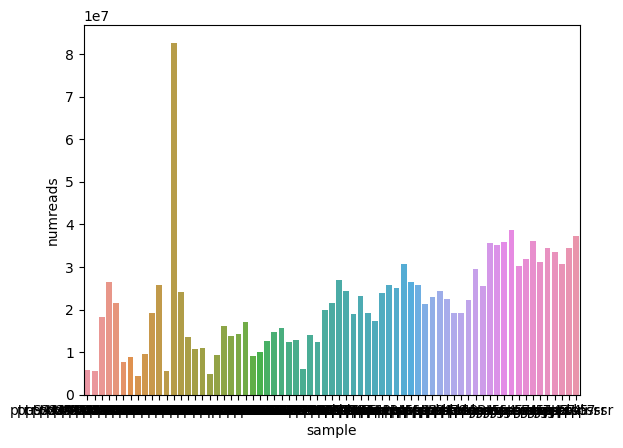

In [73]:
plt.rcdefaults()

sns.barplot(summary_all, x = "sample", y = "numreads")

Set rcParams

In [52]:
# X, Hue, Row
X = "#rname"
HUE = "tissue"
ROW = "source"

plt.rcdefaults()
rcParams["figure.dpi"] = 300
figwidth = len(set(result[X])) * len(set(result[HUE]))
rcParams["figure.figsize"] = [figwidth, 10]
# rcParams["figure.figsize"] = {"egr": [40, 10], "ptr": [40, 10]}[SPECIES]
rcParams["font.size"] = 22
group_palette = {
    "source": {
        "box": {"lab1136": "brown", "SRA": "gray"},
        "strip": {"lab1136": "indianred", "SRA": "black"}
    },
    "tissue": {
        "box": {"x": "brown", "p": "tomato", "s": "greenyellow", "l": "green"},
        "strip": {"x": "brown", "p": "tomato", "s": "greenyellow", "l": "green"}
    }
}
sns.set_style("whitegrid")

# source_palette = {
#     "box": {"lab1136": "brown", "SRA": "gray"},
#     "strip": {"lab1136": "indianred", "SRA": "black"}
# }
# tissue_palette = {
#     "x": "brown",
#     "p": "tomato",
#     "s": "greenyellow",
#     "l": "green"
# }

`Y = "numreads"`

In [ ]:
# Y
Y = "numreads"

# TYPE OF PLOTS
PLOT_BOX = True
PLOT_STRIP = True

# 
aspect = rcParams['figure.figsize']
ratio = aspect[0] / aspect[1]
g = sns.FacetGrid(
    result,
    row=ROW,
    aspect=ratio,
    height=rcParams['figure.figsize'][1],
    margin_titles=True,
    legend_out=False
)

if PLOT_BOX:
    g.map_dataframe(
        sns.boxplot,
        x=X,
        y=Y,
        hue=HUE,
        palette=group_palette[HUE]["box"],
        hue_order=list(group_palette[HUE]["box"].keys()),
        fliersize=0,
    )
    
if PLOT_STRIP:
    g.map_dataframe(
        sns.stripplot,
        x=X,
        y=Y,
        hue=HUE,
        palette=group_palette[HUE]["strip"],
        hue_order=list(group_palette[HUE]["strip"].keys()),
        size=10,
        dodge=True
    )

# add legend
g.add_legend()

# save figure
plt.savefig(f"pyplt/{SPECIES.capitalize()}_y={Y}_x={X}_hue={HUE}_row={ROW}.png", bbox_inches='tight')
plt.show()

`Y = "covbases"`

In [ ]:
# Y
Y = "covbases"

# TYPE OF PLOTS
PLOT_BOX = True
PLOT_STRIP = True

# 
aspect = rcParams['figure.figsize']
ratio = aspect[0] / aspect[1]
g = sns.FacetGrid(
    result,
    row=ROW,
    aspect=ratio,
    height=rcParams['figure.figsize'][1],
    margin_titles=True,
    legend_out=False
)

if PLOT_BOX:
    g.map_dataframe(
        sns.boxplot,
        x=X,
        y=Y,
        hue=HUE,
        palette=group_palette[HUE]["box"],
        hue_order=list(group_palette[HUE]["box"].keys()),
        fliersize=0,
    )
    
if PLOT_STRIP:
    g.map_dataframe(
        sns.stripplot,
        x=X,
        y=Y,
        hue=HUE,
        palette=group_palette[HUE]["strip"],
        hue_order=list(group_palette[HUE]["strip"].keys()),
        size=10,
        dodge=True
    )

# add legend
g.add_legend()

# save figure
plt.savefig(f"pyplt/{SPECIES.capitalize()}_y={Y}_x={X}_hue={HUE}_row={ROW}.png", bbox_inches='tight')
plt.show()

`Y = "meandepth"`

In [ ]:
# Y
Y = "meandepth"

# TYPE OF PLOTS
PLOT_BOX = True
PLOT_STRIP = True

# 
aspect = rcParams['figure.figsize']
ratio = aspect[0] / aspect[1]
g = sns.FacetGrid(
    result,
    row=ROW,
    aspect=ratio,
    height=rcParams['figure.figsize'][1],
    margin_titles=True,
    legend_out=False
)

if PLOT_BOX:
    g.map_dataframe(
        sns.boxplot,
        x=X,
        y=Y,
        hue=HUE,
        palette=group_palette[HUE]["box"],
        hue_order=list(group_palette[HUE]["box"].keys()),
        fliersize=0,
    )
    
if PLOT_STRIP:
    g.map_dataframe(
        sns.stripplot,
        x=X,
        y=Y,
        hue=HUE,
        palette=group_palette[HUE]["strip"],
        hue_order=list(group_palette[HUE]["strip"].keys()),
        size=10,
        dodge=True
    )

# add legend
g.add_legend()

# save figure
plt.savefig(f"pyplt/{SPECIES.capitalize()}_y={Y}_x={X}_hue={HUE}_row={ROW}.png", bbox_inches='tight')
plt.show()

`Y = "meandepth_nonzero"`

In [ ]:
# Y
Y = "meandepth_nonzero"

# TYPE OF PLOTS
PLOT_BOX = True
PLOT_STRIP = True

# 
aspect = rcParams['figure.figsize']
ratio = aspect[0] / aspect[1]
g = sns.FacetGrid(
    result,
    row=ROW,
    aspect=ratio,
    height=rcParams['figure.figsize'][1],
    margin_titles=True,
    legend_out=False
)

if PLOT_BOX:
    g.map_dataframe(
        sns.boxplot,
        x=X,
        y=Y,
        hue=HUE,
        palette=group_palette[HUE]["box"],
        hue_order=list(group_palette[HUE]["box"].keys()),
        fliersize=0,
    )
    
if PLOT_STRIP:
    g.map_dataframe(
        sns.stripplot,
        x=X,
        y=Y,
        hue=HUE,
        palette=group_palette[HUE]["strip"],
        hue_order=list(group_palette[HUE]["strip"].keys()),
        size=10,
        dodge=True
    )

# add legend
g.add_legend()

# save figure
plt.savefig(f"pyplt/{SPECIES.capitalize()}_y={Y}_x={X}_hue={HUE}_row={ROW}.png", bbox_inches='tight')
plt.show()

### [STEP1] Removing ***TRASHY*** lines in the final output from REDItools2.0 using `scripts/remove_blines.py`  
There are redundant and meaningless lines in REDItools2.0 final output table

### [STEP2] Filter REDItable using the AWK program (`scripts/redit_filter.sh`)
REDItable headers:  
1. Region
2. Postition
3. Reference 
4. Strand 
5. Coverage-q25
6. MeanQ 
7. BaseCount[A,C,G,T]
8. AllSubs
9. Frequency
10. gCoverage-q25
11. gMeanQ
12. gBaseCount[A,C,G,T] 
13. gAllSubs
14. gFrequency  

Applied filters:
1. Coverage-q25 > 10
2. Frequency > 0.1
3. gFrequency == 0.00

The AWK command:  
`awk -F "\t" -v OFS="\t" '$5 > 10 && $9 > 0.1 && $14 == 0.00 {print}' [Input] > [Output]`

In [ ]:
print(
    *glob.glob(str(FILTERED_PATH["Ptr"] / "*.txt")),
    "\nand",
    *glob.glob(str(FILTERED_PATH["Egr"] / "*.txt")),
    sep=", "
)

#### Visualize the characters of the filtered data

Set the species to process

In [ ]:
SPECIES = "Ptr"

Read filtered tables

In [ ]:
df_dict = {
    sample: pd.read_table(
        FILTERED_PATH[SPECIES] / sample,
        sep="\t",
        header=None,
        names=REDIT_HEADER
    ) for sample in SAMPLES[SPECIES]
}

In [ ]:
df_dict[list(df_dict.keys())[-1]]

Visualizing the number of editing sites per sample

In [ ]:
plt.rcdefaults()
rcParams["figure.dpi"] = 300
rcParams["figure.figsize"] = [len(df_dict) * .3, 6]
rcParams["font.size"] = 12

tmp = {"sample": [], "numedsites": []}
for sample, df in df_dict.items():
    tmp["sample"].append(sample)
    tmp["numedsites"].append(df.shape[0])
    
ax = sns.barplot(
    data=pd.DataFrame(tmp),
    x="sample",
    y="numedsites",
    linewidth=2,
    edgecolor=".5",
    facecolor=(0, 0, 0, 0)
)
ax.set_title(f"numedsites ({SPECIES}; Freq > .1; Depth > 10; gFreq == 0)")

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)
# color xtick labels by tissue type
palette = {
    "x": "brown",
    "p": "tomato",
    "s": "greenyellow",
    "l": "green"
}
[t.set_color(palette[t._text[-6]]) for t in ax.xaxis.get_ticklabels()]

plt.savefig(f"pyplt/{SPECIES}_y=numedsites_x=sample.png", bbox_inches='tight')
plt.show()

Record locations as sets of tuple `Tuple[Region, Position]`

In [ ]:
locs = {sample: set([(t.Region, t.Position) for t in df.itertuples()]) for sample, df in df_dict.items()}

Calculate the overlapping percentage between samples

In [ ]:
n_sample = len(SAMPLES[SPECIES])
mat = pd.DataFrame(
    [[0] * n_sample] * n_sample,
    index=SAMPLES[SPECIES],
    columns=SAMPLES[SPECIES]
)
for i in SAMPLES[SPECIES]:
    for j in SAMPLES[SPECIES]:
        num_union = len(locs[i].union(locs[j]))
        num_itersection = len(locs[i].intersection(locs[j]))
        mat.loc[i, j] = num_itersection / num_union

Visualizing the overlapping percentage as heatmap

In [ ]:
rcParams["figure.figsize"] = [20, 20]
rcParams["figure.dpi"] = 300
rcParams["axes.titlesize"] = 20
rcParams["xtick.labelsize"] = 14
rcParams["ytick.labelsize"] = 14
rcParams["font.size"] = 12


ax = sns.heatmap(mat[mat != 1], annot=True, fmt=".2f")
ax.set_title("Overlapping percentage between samples")
plt.savefig(f"pyplt/{SPECIES}_sample_percent_overlap.png", bbox_inches='tight')
plt.show()

## [STEP3] Identify DE-events (**D**ifferentially **E**dited) between xylem and other samples using the method described in:  
"C. Lo Giudice, M. A. Tangaro, G. Pesole, E. Picardi, Investigating RNA editing in deep transcriptome datasets with REDItools and REDIportal. Nat Protoc 15, 1098-1131 (2020)."
and the [GitHub page](https://github.com/BioinfoUNIBA/QEdit/tree/master/scripts)


_**Samples downloaded from SRA are excluded in following analyses**_

Static configs

In [ ]:
PATH_FILTERED = Path("shout/filtered_c10_f10_g0/")
PATH_ARCHIVED = Path("pyout/archive-20230104/")
PATH_PYFILTED = Path("pyout/filtered_c10_f10_g0/")
PATH_LOCUNION = {
    "Ptr": Path("pyout/LOC_UNION_PTR.txt"),
    "Egr": Path("pyout/LOC_UNION_EGR.txt")
}
REDIT_HEADER = [
    "Region", "Position", "Reference", "Strand", 
    "Coverage_q25", "MeanQ", "BaseCount", "AllSubs", "Frequency",
    "gCoverage_q25", "gMeanQ", "gBaseCount", "gAllSubs", "gFrequency"
]
SAMPLES = {
    "Ptr": {
        "xylem": {
            "ptr-tsp1-xr.txt", "ptr-tsp2-xr.txt", "ptr-tsp3-xr.txt", "ptr-tsp4-xr.txt", "ptr-tsp5-xr.txt", "ptr-tsp6-xr.txt"
        }, 
        "phloem": {
            "ptr-tsp1-pr.txt", "ptr-tsp2-pr.txt", "ptr-tsp3-pr.txt", "ptr-tsp4-pr.txt", "ptr-tsp5-pr.txt", "ptr-tsp6-pr.txt"
        }, 
        "leaf": {
            "ptr-tsp1-lr.txt", "ptr-tsp2-lr.txt", "ptr-tsp3-lr.txt", "ptr-tsp4-lr.txt", "ptr-tsp5-lr.txt", "ptr-tsp6-lr.txt"
        }, 
        "shoot": {
            "ptr-tsp1-sr.txt", "ptr-tsp2-sr.txt", "ptr-tsp3-sr.txt", "ptr-tsp4-sr.txt", "ptr-tsp5-sr.txt", "ptr-tsp6-sr.txt"
        }
    },
    "Egr": {
        "xylem": {
            "egr-tsp4-xr.txt", "egr-tsp5-xr.txt", "egr-tsp7-xr.txt"
        },
        "phloem": {
            "egr-tsp4-pr.txt", "egr-tsp5-pr.txt", "egr-tsp7-pr.txt"
        },
        "leaf": {
            "egr-tsp4-lr.txt", "egr-tsp5-lr.txt", "egr-tsp7-lr.txt"
        },
        "shoot": {
            "egr-tsp4-sr.txt", "egr-tsp5-sr.txt", "egr-tsp7-sr.txt"
        }        
    }
}

Params per analysis

In [ ]:
# Species to process
SPECIES = "Ptr"

# Output DEtable
FOUT = Path()

Get the union of locations of all samples